In [1]:
import pandas as pd

In [23]:
rs_gestational = ["rs2963463","rs201770678", "rs12520982","rs7729301","rs2946171",
                  "rs2955117","rs2999049","rs2461794","rs201226733","rs200745338",\
                  "rs10934853","rs2999052","rs2687729","rs2811474",
                  "rs201226733","rs201386833","rs35401609","rs5950491",
                  "rs56318008","rs55938609", "rs3820282", "rs12037376","rs3765350",
                  "rs2235529",
                  "rs4383453","rs78519666", "rs6794803", "rs9861425", 
             "rs4853012","rs13390332", "rs6721042","rs17009553",
                  "rs717267","rs6475050", "rs10810563", "rs9298764",
                  "rs4658267", "rs4658265", "rs284201",
                  "rs182704","rs1622127", "rs162621",
                  "rs2532929","rs2532927", "rs2532926",
                  "rs200879388", "rs2999094", "rs2747027", 
                  "rs2253165","rs2245244","rs2253011"]

rs_preterm = ["rs2963463","rs2964484","rs2419911", "rs12520982","rs7729301","rs2946169",
              "rs201450565","rs3849531", "rs4857841", "rs10934853", "rs2687729", "rs2999052",
              "rs200745338","rs2811474", 
              "rs7217780","rs66847224", "rs2024157", "rs1380181","rs179521",
              "rs11466328","rs139581508","rs8108632", 
              "rs201386833","rs5991030","rs62602480","rs5950506"]
gwa_snps = ["rs7729301", "rs10934853","rs2999052", "rs2687729","rs2811474", "rs3820282",
            "rs3765350","rs2235529", "rs10917151","rs4654783", "rs1380181"]
eqtls_ingwa_gestations = ["rs1023666", "rs6439111", "rs1030655", "rs7632756","rs4857868",
                           "rs7355887","rs7355887","rs2955117", "rs7632756", "rs2999049",
                           "rs2811485", "rs2811485", "rs144609957", "rs3849531",
                           "rs1735546", "rs10917123", "rs10917123","rs10917123", "rs12037376",
                           "rs6771801", "rs11711950","rs78519666", "rs6807089", "rs78519666",
                           "rs6771801","rs11711950","rs2062432", "rs60414302","rs60414302", "rs62265764",
                           "rs55942221", "rs60414302", "rs4677884","rs2421752","rs2122290","rs6721042",
                           "rs13390332", "rs6721042", "rs162621"]
eqtls_ingwa_preterm = ["rs7632756", "rs4857868", "rs7355887", "rs7355887", "rs2955117", "rs7632756",
                       "rs2999049", "rs2811485", "rs2811485", "rs144609957", "rs3849531", "rs1735546",
                       "rs4857837", "rs2024157"]

In [50]:
df = pd.read_csv("fisher_model_logistic.csv")
df.head()

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,STAT,P
0,1,.,10108,C,ADD,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,rs375931351,10146,AC,ADD,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,.,10424,C,ADD,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,.,10427,A,ADD,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,rs56289060,10433,A,ADD,1,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df[df["SNP"].isin(rs_preterm+eqtls_ingwa_preterm)].to_csv("fisher_model_logistic_SNP_isin_preterm.csv", index = False)

In [9]:
df = df[df.P.notna()] # Drop all rows if P value contains NAN value

In [11]:
# save removed na df
df.to_csv("fisher_model_logistic_not_na.csv", index=False)

In [12]:
# CHECK SAVED DATA fRMAE
df = pd.read_csv("fisher_model_logistic_not_na.csv")

In [13]:
print(df.shape)
df.head()

(5195348, 12)


,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,STAT,P
0,1,rs201725126,13116,T,ADD,28,1.299000e-07,1448.0,0.0,inf,-1.095000e-02,0.9913
1,1,.,13418,G,ADD,11,9.998000e-01,2048.0,0.0,inf,-1.193000e-07,1.0000
2,1,rs200030104,15190,G,ADD,15,8.825000e-01,2048.0,0.0,inf,-6.104000e-05,1.0000
3,1,rs78601809,15211,T,ADD,49,1.862000e-07,1024.0,0.0,inf,-1.513000e-02,0.9879
4,1,.,15543,T,ADD,37,1.032000e+00,1024.0,0.0,inf,3.053000e-05,1.0000


###  plot manhattan plot

In [14]:
from Pyhattan import FormatData, GenerateManhattan
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image_name = "fisher_model_logistic_not_na1.png"

data loaded now plotting 


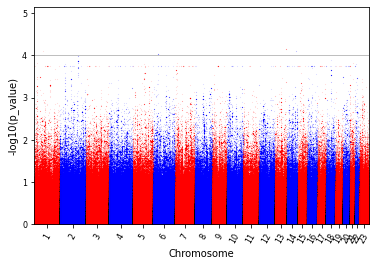

Image Saved in Your Location check image fisher_model_logistic_not_na1.png


In [20]:
data = FormatData("fisher_model_logistic_not_na.csv",sep=",",
                  chromosome="CHR", p_value="P")
print("data loaded now plotting ")
GenerateManhattan(data, significance = 4, colors=["red","blue"], 
                  export_path= image_name)
print("Image Saved in Your Location check image", image_name)

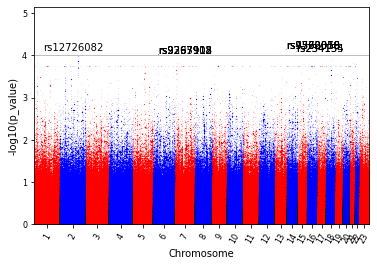

Image Saved in Your Location check image fisher_model_logistic_not_na1.png


In [21]:
# With_SNP 
GenerateManhattan(data, significance = 4, colors=["red","blue"], refSNP="SNP",
                  export_path="fisher_manhattan_snp_not_na.png")
print("Image Saved in Your Location check image", image_name)

In [24]:
df.head()

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,STAT,P
0,1,rs201725126,13116,T,ADD,28,1.299000e-07,1448.0,0.0,inf,-1.095000e-02,0.9913
1,1,.,13418,G,ADD,11,9.998000e-01,2048.0,0.0,inf,-1.193000e-07,1.0000
2,1,rs200030104,15190,G,ADD,15,8.825000e-01,2048.0,0.0,inf,-6.104000e-05,1.0000
3,1,rs78601809,15211,T,ADD,49,1.862000e-07,1024.0,0.0,inf,-1.513000e-02,0.9879
4,1,.,15543,T,ADD,37,1.032000e+00,1024.0,0.0,inf,3.053000e-05,1.0000


In [47]:
#_ = df.sort_values(by=["P"])
#_.to_csv("logistic_model_fisher_p_sorted.xlsx", index = False)

In [49]:
_ = df[df.P < 0.05]
_.to_csv("logistic_model_fisher_p_sorted_lt05.csv", index = False)

### Reading P value less than 0.5

In [56]:
df = pd.read_csv("logistic_model_fisher_p_sorted_lt05.csv")
df_ = pd.read_excel("fisher_model_p_lt05.xlsx", sheet_name="fisher_model_p_lt05")

In [60]:
df.head(10)

,Unnamed: 0,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,STAT,P
0,68,1,rs377389630,123511,G,ADD,15,16.00000,1.3690,1.09300,234.2000,2.025,0.042880
1,90,1,rs201583565,235976,C,ADD,48,0.10560,1.1160,0.01185,0.9407,-2.015,0.043930
2,213,1,rs58324164,753849,G,ADD,44,0.20360,0.6685,0.05493,0.7548,-2.381,0.017280
3,221,1,rs3115858,755890,A,ADD,22,0.05195,1.1110,0.00589,0.4582,-2.663,0.007753
4,391,1,rs77649307,824115,A,ADD,32,0.00000,1024.0000,0.00000,0.0000,-3.752,0.000175
5,440,1,rs4970382,840753,T,ADD,42,0.17110,0.8686,0.03117,0.9387,-2.033,0.042070
6,631,1,rs56411007,904757,A,ADD,60,6.00000,0.8333,1.17200,30.7200,2.150,0.031540
7,632,1,rs34160727,905130,ATG,ADD,52,4.90000,0.6343,1.41300,16.9900,2.505,0.012230
8,637,1,rs3892467,909073,C,ADD,54,4.37500,0.6036,1.34000,14.2800,2.445,0.014470
9,653,1,rs6660139,916549,A,ADD,60,4.50000,0.7214,1.09400,18.5000,2.085,0.037070


In [67]:
#df_[df_["TEST"] == "ADD"]
df_.TEST.unique()

array(['GENO', 'DOM', 'TREND', 'ALLELIC'], dtype=object)

In [68]:
df.TEST.unique()

array(['ADD'], dtype=object)

In [69]:
df_[df_.TEST == "GENO"]

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,P
0,13,rs7332016,G,C,GENO,2000-02-25 00:00:00,0/20/9,0.000002
2,13,rs9560058,C,A,GENO,2000-02-25 00:00:00,0/20/9,0.000002
4,13,rs9560059,G,C,GENO,2000-02-25 00:00:00,0/20/9,0.000002
6,13,rs4773370,T,G,GENO,2000-02-25 00:00:00,0/20/9,0.000002
13,16,rs11644681,A,C,GENO,0/22/1,2000-04-12 00:00:00,0.000005
...,...,...,...,...,...,...,...,...
470150,17,rs11079660,A,G,GENO,0/15/9,2000-09-19 00:00:00,0.049980
470152,17,rs2880541,A,G,GENO,0/15/9,2000-09-19 00:00:00,0.049980
470154,18,rs510164,G,C,GENO,0/19/9,2000-09-15 00:00:00,0.049980
470156,18,rs4432354,G,T,GENO,0/15/9,2000-09-19 00:00:00,0.049980


In [70]:
df_[df_.TEST == "DOM"]

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,P
1,13,rs7332016,G,C,DOM,2020-02-25 00:00:00,2020-09-20 00:00:00,0.000002
3,13,rs9560058,C,A,DOM,2020-02-25 00:00:00,2020-09-20 00:00:00,0.000002
5,13,rs9560059,G,C,DOM,2020-02-25 00:00:00,2020-09-20 00:00:00,0.000002
7,13,rs4773370,T,G,DOM,2020-02-25 00:00:00,2020-09-20 00:00:00,0.000002
14,16,rs11644681,A,C,DOM,2020-01-22 00:00:00,2020-12-04 00:00:00,0.000005
...,...,...,...,...,...,...,...,...
470151,17,rs11079660,A,G,DOM,2020-09-15 00:00:00,2020-09-19 00:00:00,0.049980
470153,17,rs2880541,A,G,DOM,2020-09-15 00:00:00,2020-09-19 00:00:00,0.049980
470155,18,rs510164,G,C,DOM,2020-09-19 00:00:00,2020-09-15 00:00:00,0.049980
470157,18,rs4432354,G,T,DOM,2020-09-15 00:00:00,2020-09-19 00:00:00,0.049980


In [71]:
df_[df_.TEST == "TREND"]

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,P
8,13,rs7332016,G,C,TREND,2/52,20/38,0.000002
9,13,rs9560058,C,A,TREND,2/52,20/38,0.000002
10,13,rs9560059,G,C,TREND,2/52,20/38,0.000002
11,13,rs4773370,T,G,TREND,2/52,20/38,0.000002
12,16,rs11644681,A,C,TREND,22/24,2020-04-28 00:00:00,0.000004
...,...,...,...,...,...,...,...,...
470271,16,rs216091,A,G,TREND,13/41,7/53,0.049990
470272,16,rs2541613,G,A,TREND,13/41,7/53,0.049990
470273,16,rs11539618,C,G,TREND,7/53,13/41,0.049990
470274,16,rs75623060,G,A,TREND,7/53,13/41,0.049990


In [74]:
df_[df_.TEST == "ALLELIC"].head(50)

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,P
48,13,rs7332016,G,C,ALLELIC,2/52,20/38,0.000029
49,13,rs9560058,C,A,ALLELIC,2/52,20/38,0.000029
50,13,rs9560059,G,C,ALLELIC,2/52,20/38,0.000029
51,13,rs4773370,T,G,ALLELIC,2/52,20/38,0.000029
130,6,rs1171123,G,C,ALLELIC,13/45,0/60,0.000045
452,6,rs568129,G,A,ALLELIC,12/46,0/60,0.000105
727,23,rs5922947,A,C,ALLELIC,0/60,11/43,0.000149
895,14,rs1307770,T,A,ALLELIC,1/55,14/40,0.000176
1126,1,rs12750195,T,C,ALLELIC,16/42,2/58,0.000226
1127,1,rs10753682,A,C,ALLELIC,16/42,2/58,0.000226


## New from 08

In [5]:
import pandas as pd
from Pyhattan import FormatData, GenerateManhattan
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./new_06/fisher_only.csv")

In [4]:
df.head()

,CHR,SNP,BP,A1,F_A,F_U,A2,P,OR,SE,L95,U95
0,1,.,10108,C,NaN,0.5,CT,1.0,NaN,NaN,NaN,NaN
1,1,rs375931351,10146,AC,0.5,NaN,A,1.0,NaN,NaN,NaN,NaN
2,1,.,10424,C,NaN,0.5,CCT,1.0,NaN,NaN,NaN,NaN
3,1,.,10427,A,0.5,0.5,AC,1.0,1.0,2.0,0.01984,50.4
4,1,rs56289060,10433,A,NaN,0.5,AC,1.0,NaN,NaN,NaN,NaN


In [6]:
image_name = "manhattan_fisher_only_08_i.png"

data loaded now plotting 


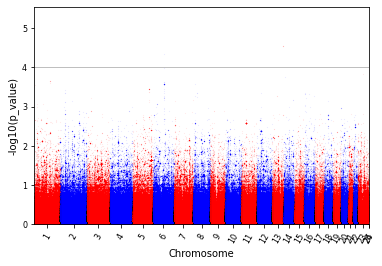

Image Saved in Your Location check image manhattan_fisher_only_08_i.png


In [7]:
data = FormatData("./new_06/fisher_only.csv",sep=",",
                  chromosome="CHR", p_value="P")
print("data loaded now plotting ")
GenerateManhattan(data, significance = 4, colors=["red","blue"], 
                  export_path= image_name)
print("Image Saved in Your Location check image", image_name)

<Figure size 1440x720 with 0 Axes>

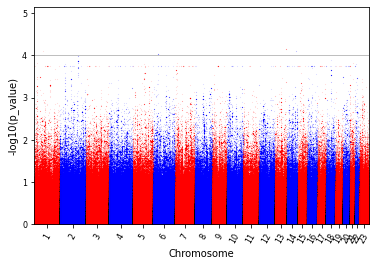

Image Saved in Your Location check image manhattan_fisher_only_08_i.png


In [10]:
plt.figure(figsize=[20,10])
GenerateManhattan(data, significance = 4, colors=["red","blue"], 
                  export_path= image_name)
print("Image Saved in Your Location check image", image_name)

In [ ]:
plt.figure(figsize=[20,10])
GenerateManhattan(data, significance = 4, colors=["red","blue"], 
                  export_path= image_name)
print("Image Saved in Your Location check image", image_name)